<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [1]:
import tensorflow as tf
from keras.datasets import fashion_mnist
import pandas as pd
import matplotlib.pyplot as plt
import random
import numpy as np
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [2]:
# load dataset
(trainX, trainY), (testX, testY) = fashion_mnist.load_data()

In [3]:
print('Train: X=%s, y=%s' % (trainX.shape, trainY.shape))
print('Test: X=%s, y=%s' % (testX.shape, testY.shape))


Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


In [4]:
type(trainX)

numpy.ndarray

In [ ]:
np.unique(trainY)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [19]:
len(trainX[0,3:])

25

In [26]:
trainX[i,0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  25,
       170, 118, 108, 148,  30,   0,   0,   2,   1,   1,   0,   0,   0,
         0,   0], dtype=uint8)

34612


TypeError: only size-1 arrays can be converted to Python scalars

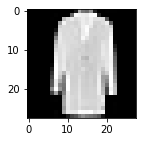

In [25]:
#Define class labels for easy interpretation
class_names = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I']

#Sanity check - plot a few images and labels
i = random.randint(1,trainX.shape[0])
print(i)
fig1, ax1 = plt.subplots(figsize=(2,2))
plt.imshow(trainX[i,:], cmap='gray') 
print("Label for the image is: ", class_names[int(trainX[i,0])])

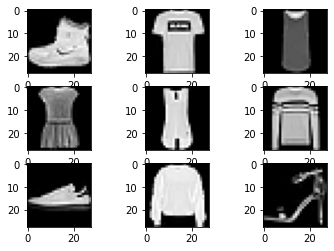

In [ ]:
# plot first few images
for i in range(9):
	# define subplot
	plt.subplot(330 + 1 + i)
	# plot raw pixel data
	plt.imshow(trainX[i], cmap=plt.get_cmap('gray'))
# show the figure
plt.show()

In [ ]:
# reshape dataset to have a single channel
trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
testX = testX.reshape((testX.shape[0], 28, 28, 1))

In [ ]:
# one hot encode target values
trainY_cat = tf.keras.utils.to_categorical(trainY)
testY_cat = tf.keras.utils.to_categorical(testY)

In [ ]:
print(trainY[0])
print(trainY_cat[0])

9
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [ ]:
# convert from integers to floats
trainX = trainX.astype('float32')
testX = testX.astype('float32')
# normalize to range 0-1
trainX = trainX / 255.0
testX = testX / 255.0

In [ ]:
model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape = (28,28,1), activation='relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(128, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

In [ ]:
model.compile(loss ='categorical_crossentropy', optimizer='adam', metrics =['acc'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 128)         7

In [ ]:
history = model.fit(trainX, trainY_cat, batch_size = 128, epochs = 10, verbose = 1, validation_data = (testX, testY_cat))


Epoch 1/10
469/469 [==============================] - 47s 7ms/step - loss: 1.0628 - acc: 0.6026 - val_loss: 0.5391 - val_acc: 0.8066
Epoch 2/10
469/469 [==============================] - 3s 6ms/step - loss: 0.5402 - acc: 0.8006 - val_loss: 0.4405 - val_acc: 0.8426
Epoch 3/10
469/469 [==============================] - 3s 6ms/step - loss: 0.4620 - acc: 0.8313 - val_loss: 0.4096 - val_acc: 0.8474
Epoch 4/10
469/469 [==============================] - 3s 6ms/step - loss: 0.4211 - acc: 0.8447 - val_loss: 0.3799 - val_acc: 0.8641
Epoch 5/10
469/469 [==============================] - 3s 6ms/step - loss: 0.3955 - acc: 0.8517 - val_loss: 0.3569 - val_acc: 0.8690
Epoch 6/10
469/469 [==============================] - 3s 6ms/step - loss: 0.3673 - acc: 0.8632 - val_loss: 0.3480 - val_acc: 0.8733
Epoch 7/10
469/469 [==============================] - 3s 6ms/step - loss: 0.3507 - acc: 0.8706 - val_loss: 0.3309 - val_acc: 0.8779
Epoch 8/10
469/469 [==============================] - 3s 6ms/step - loss: 0

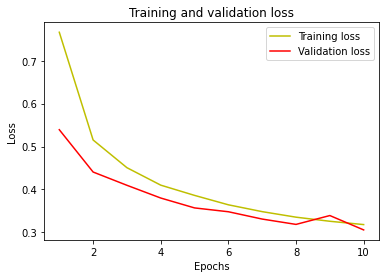

In [ ]:
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

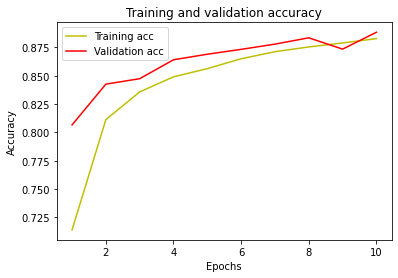

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
prediction = model.predict_classes(testX)
print("Actual Labels    : ", testY)
print("Predicted Labels : ", prediction)


/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Actual Labels    :  [9 2 1 ... 8 1 5]
Predicted Labels :  [9 2 1 ... 8 1 5]


In [ ]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(testY, prediction)
print('Accuracy Score = ', accuracy)

Accuracy Score =  0.8884


Predicted Label:  3
True Label:  1


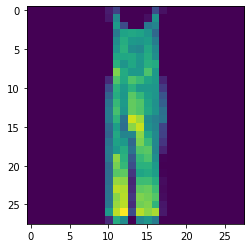

In [ ]:
i = random.randint(1,len(prediction))
plt.imshow(testX[i,:,:,0]) 
print("Predicted Label: ", int(prediction[i]))
print("True Label: ", int(testY[i]))


In [ ]:
def plot_confusion_matrix(cm, classes,
                              normalize=False,
                              title='Confusion matrix',
                              cmap=plt.cm.Blues):
        """
        This function prints and plots the confusion matrix.
        Normalization can be applied by setting `normalize=True`.
        """
        import itertools
        if normalize:
            cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
            print("Normalized confusion matrix")
        else:
            print('Confusion matrix, without normalization')

        #print(cm)

        plt.imshow(cm, interpolation='nearest', cmap=cmap)
        plt.title(title)
        #plt.colorbar()
        tick_marks = np.arange(len(classes))
        plt.xticks(tick_marks, classes, rotation=45)
        plt.yticks(tick_marks, classes)

        fmt = '.2f' if normalize else 'd'
        thresh = cm.max() / 2.
        for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            plt.text(j, i, format(cm[i, j], fmt),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")

        plt.ylabel('True label')
        plt.xlabel('Predicted label')
        plt.tight_layout()
        plt.show()

Confusion matrix, without normalization


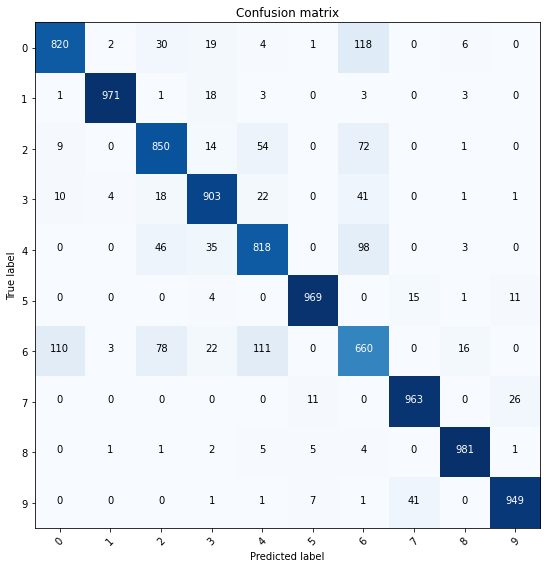

In [ ]:
from sklearn.metrics import confusion_matrix
test_label_list=list(np.unique(testY))
cnf_matrix = confusion_matrix(testY, prediction,labels=test_label_list)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize=(8,8))
plot_confusion_matrix(cnf_matrix, classes=test_label_list,
                      title='Confusion matrix')

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(testY, prediction))

              precision    recall  f1-score   support

           0       0.86      0.82      0.84      1000
           1       0.99      0.97      0.98      1000
           2       0.83      0.85      0.84      1000
           3       0.89      0.90      0.89      1000
           4       0.80      0.82      0.81      1000
           5       0.98      0.97      0.97      1000
           6       0.66      0.66      0.66      1000
           7       0.95      0.96      0.95      1000
           8       0.97      0.98      0.98      1000
           9       0.96      0.95      0.95      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000

